# Восстановление золота из руды

# Содержание

**[1. Подготовка данных](#step1)**

**[2. Анализ данных](#step2)**

**[3. Модель](#step3)**



Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

<a id='step1'></a>  **Подготовка данных**

1. Подготовьте данные
1.1. Откройте файлы и изучите их.
Путь к файлам:  
•	/datasets/gold_industry_train.csv.   
•	/datasets/gold_industry_test.csv. 
•	/datasets/gold_industry_full.csv.  
1.2. Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака   rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.  
1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?  
1.4. Проведите предобработку данных. 
 

In [1]:
import pandas as pd # импорт библиотеки pandas 
import matplotlib.pyplot as plt # импорт библиотеки matplotlib
plt.style.use('seaborn-bright')
import seaborn as sns # импорт библиотеки seaborn
import numpy as np # импорт библиотеки numpy
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
import time
from tqdm import tqdm # импорт библиотеки tqdm для просмотра прогресса обучения модели
import warnings
warnings.filterwarnings("ignore")

/var/folders/w8/whz827qx38v0ln9s213kypp00000gp/T/ipykernel_9600/1584260939.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-bright')


In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
df_train = pd.read_csv('datasets/gold_industry_train.csv')
df_test = pd.read_csv('datasets/gold_industry_train.csv')
df_full = pd.read_csv('datasets/gold_industry_train.csv')

df_list = [df_full, df_train, df_test]

pd.options.display.max_columns = None # полностью отображаем столбцы

In [4]:
for df in df_list:
    display(df.head())
    df.info()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.47

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.47

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.47

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


***Описание данных***  

Технологический процесс 

Rougher feed — исходное сырье  
Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant  
Xanthate — ксантогенат (промотер, или активатор флотации);  
Sulphate — сульфат (на данном производстве сульфид натрия);  
Depressant — депрессант (силикат натрия).  
Rougher process (англ. «грубый процесс») — флотация  
Rougher tails — отвальные хвосты  
Float banks — флотационная установка  
Cleaner process — очистка  
Rougher Au — черновой концентрат золота  
Final Au — финальный концентрат золота  

Параметры этапов  
air amount — объём воздуха   
fluid levels — уровень жидкости  
feed size — размер гранул сырья  
feed rate — скорость подачи  

Наименование признаков  
Наименование признаков должно быть такое:  
[этап].[тип_параметра].[название_параметра]
Пример: rougher.input.feed_ag  

Возможные значения для блока [этап]:  
rougher — флотация  
primary_cleaner — первичная очистка  
secondary_cleaner — вторичная очистка  
final — финальные характеристики  

Возможные значения для блока [тип_параметра]:  
input — параметры сырья  
output — параметры продукта  
state — параметры, характеризующие текущее состояние этапа  
calculation — расчётные характеристики  


Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между нашими расчётами и значением признака. Опишем выводы.

In [5]:

# создаём функцию и приводим в ней формулу расчета recovery

def output_recovery(C, F, T):
    recovery = (C * (F - T)) / (F * (C - T)) * 100
    return recovery

где:

C — доля золота в концентрате после флотации/очистки;  
F — доля золота в сырье/концентрате до флотации/очистки;  
T — доля золота в отвальных хвостах после флотации/очистки  

Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Причём важен не только финальный продукт, но и черновой концентрат.  
Выберем то, что связано с золотодобычей, сульфаты с золотом в расчет брать не будем, смесь золота со свинцом тоже не берем.

In [6]:
# выведем необходимые расчеты в отдельный датафрейм
df_test_recovery = df_train[['rougher.output.concentrate_au', 
                            'rougher.input.feed_au', 
                            'rougher.output.tail_au', 
                            'rougher.output.recovery']]

# рассчитаем значение
df_test_recovery['check_recovery'] = df_test_recovery.apply(
    lambda row: output_recovery(row['rougher.output.concentrate_au'], 
                                row['rougher.input.feed_au'], 
                                row['rougher.output.tail_au']), 
    axis=1)

# посмотрим таблицу
df_test_recovery.head()

,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au,rougher.output.recovery,check_recovery
0,19.793808,6.486150,1.170244,87.107763,87.107763
1,20.050975,6.478583,1.184827,86.843261,86.843261
2,19.737170,6.362222,1.162562,86.842308,86.842308
3,19.320810,6.118189,1.079755,87.226430,87.226430
4,19.216101,5.663707,1.012642,86.688794,86.688794


Замечательно, что основные метрики для регрессии: MSE, RMSE, MAE можно оптимизировать напрямую. С формальной точки зрения MAE не дифференцируема, так как там присутствует модуль, чья производная не определена в нуле. На практике для этого выколотого случая в коде можно возвращать ноль.

Для оптимизации MAPE придётся изменять оптимизационную задачу. Оптимизацию MAPE можно представить как оптимизацию MAE, где объектам выборки присвоен вес.

In [7]:
# разделим на предсказания и целевой результат
df_test_recovery_target = df_test_recovery['rougher.output.recovery']
df_test_recovery_predictions = df_test_recovery['check_recovery']

# рассчитаем MAE
round(mean_absolute_error(
    df_test_recovery_target, 
    df_test_recovery_predictions
), 2)

0.0

Среднее абсолютное отклонение - указывает на то, что исходный продукт может отличаться от фактического выведенного продукта.

Средний MAE - 0.0. Выходит, что все рассчитано правильно.

Далее проанализируем признаки, недоступные в тестовой выборке. Возможно их придется исключить при обучении модели. 


In [8]:
# создаём столбец и включаем в него столбец date
columns_not_needed = ['date']

# смотрит столбцы
for col1 in df_full.columns:
    if col1 not in df_test.columns:
        columns_not_needed.append(col1)
        
columns_not_needed


['date']

Недоступные строки:

final.output.concentrate, final.output.recovery, final.output.tail - финальные характеристики полезного ископаемого, и эффективность полного цикла обогащения    
primary_cleaner.output.concentrate, primary_cleaner.output.tail - результаты первичной очистки    
rougher.calculation, rougher.output.concentrat, rougher.output.tail, rougher.output.recovery - расчетные характеристики флотационных установок,   концентрат и хвост от флотации, эффективность    
secondary_cleaner.output - результаты вторичной очистки (количество продукта)    
Как видно из названий столбцов, их объединяет одно - это результаты обогащения полезного ископаемого. Тестовая выборка содержит в себе столбцы, которые являются исходными, то есть до   начала обогащения. Именно с помощью этих данных мы должны создать модель, которая будет предсказывать эффективность будущей флотации.    

Дошли до предобработки. Посмотрим есть ли у нас дубликаты в выборках.

In [9]:
for df in df_list:
    display(df.duplicated().sum())

0

0

0

In [10]:
for df in df_list:
    display(df.isna().sum()[df.isna().sum() > 0])

rougher.input.feed_pb                                  72
rougher.input.feed_sol                                 77
rougher.input.feed_rate                                 7
rougher.input.feed_size                               101
rougher.input.floatbank10_sulfate                      31
rougher.input.floatbank10_xanthate                      7
rougher.state.floatbank10_e_air                       429
rougher.input.floatbank11_sulfate                      36
rougher.input.floatbank11_xanthate                    407
rougher.calculation.sulfate_to_au_concentrate           1
rougher.calculation.floatbank10_sulfate_to_au_feed      1
rougher.calculation.floatbank11_sulfate_to_au_feed      1
rougher.output.concentrate_sol                         18
rougher.output.tail_ag                                  1
primary_cleaner.input.sulfate                          23
primary_cleaner.input.depressant                       28
primary_cleaner.input.xanthate                         61
primary_cleane

rougher.input.feed_pb                                  72
rougher.input.feed_sol                                 77
rougher.input.feed_rate                                 7
rougher.input.feed_size                               101
rougher.input.floatbank10_sulfate                      31
rougher.input.floatbank10_xanthate                      7
rougher.state.floatbank10_e_air                       429
rougher.input.floatbank11_sulfate                      36
rougher.input.floatbank11_xanthate                    407
rougher.calculation.sulfate_to_au_concentrate           1
rougher.calculation.floatbank10_sulfate_to_au_feed      1
rougher.calculation.floatbank11_sulfate_to_au_feed      1
rougher.output.concentrate_sol                         18
rougher.output.tail_ag                                  1
primary_cleaner.input.sulfate                          23
primary_cleaner.input.depressant                       28
primary_cleaner.input.xanthate                         61
primary_cleane

rougher.input.feed_pb                                  72
rougher.input.feed_sol                                 77
rougher.input.feed_rate                                 7
rougher.input.feed_size                               101
rougher.input.floatbank10_sulfate                      31
rougher.input.floatbank10_xanthate                      7
rougher.state.floatbank10_e_air                       429
rougher.input.floatbank11_sulfate                      36
rougher.input.floatbank11_xanthate                    407
rougher.calculation.sulfate_to_au_concentrate           1
rougher.calculation.floatbank10_sulfate_to_au_feed      1
rougher.calculation.floatbank11_sulfate_to_au_feed      1
rougher.output.concentrate_sol                         18
rougher.output.tail_ag                                  1
primary_cleaner.input.sulfate                          23
primary_cleaner.input.depressant                       28
primary_cleaner.input.xanthate                         61
primary_cleane

Способы заполнить пропуски в данных:

Можем зaполнить пропуски рaндомным значением по нормaльному распределению в столбце или средним значением,
как сказано в условии задачи - данные распределены по времени, значит их можно заполнить прошлым или будущим значением столбца.

Тaк как дaнные распределены по времени, при удалении строк - нить обогащения потеряется. Так же потеряется при заполнении их медианным или средним значением.

Скорее стоит зaполнить пропуски знaчением в прошлой строке.

Заполним пропуски методом pandas ffill(), который позволяет нам заполнить значение NaN во фрейме данных. Ffill означает перенаправление заполнения, что означает, что нулевые значения заменяются данными из предыдущего столбца или строки. У нас inplace=True для внесения изменений на месте, копию возвращать не будем.

Так как полный датасет содержит в себе остальные данные - заполним пропуски там и дополним датасеты.

In [11]:
for df in df_list:
    df.ffill(inplace=True) 
    

In [12]:
for df in df_list:
    display(df.isna().sum()[df.isna().sum() > 0])

Series([], dtype: int64)

Series([], dtype: int64)

Series([], dtype: int64)

Заполнили во всех выборках разом, так как нам еще обучать и тесты проводить.

<a id='step2'></a>  **Анализ данных**

2. Проанализируйте данные  
2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.  
2.2.  Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет   неправильной.  
2.3. Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.   


rougher — флотация  
primary_cleaner — первичная очистка  
secondary_cleaner — вторичная очистка  
final — финальные характеристики  



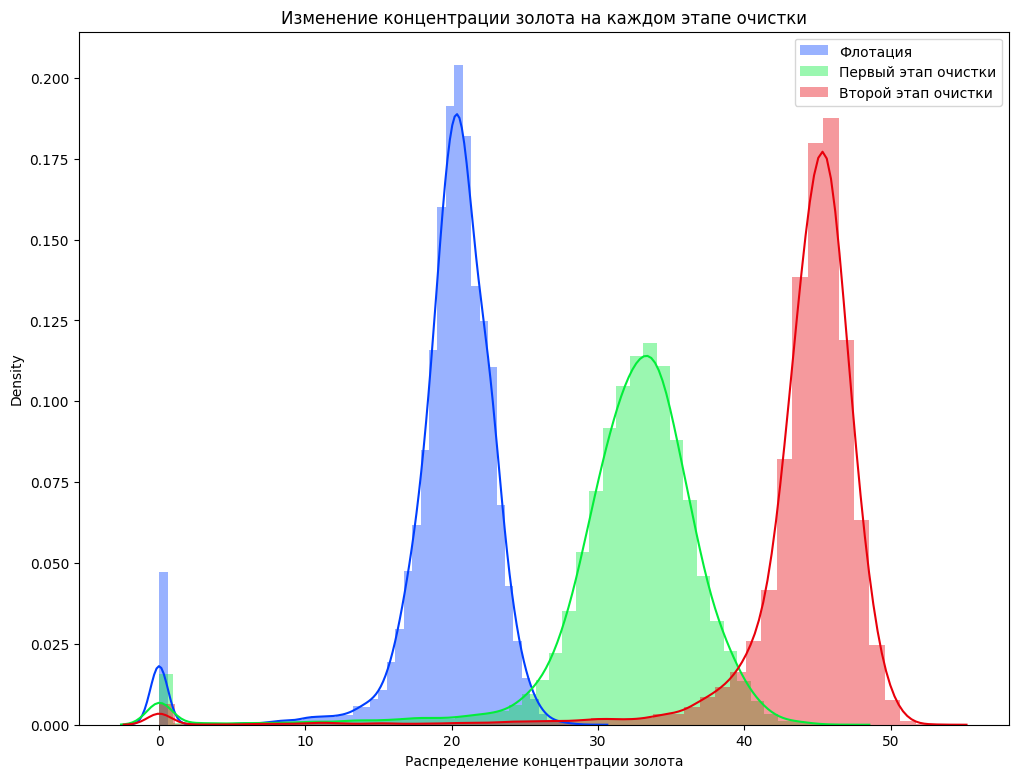

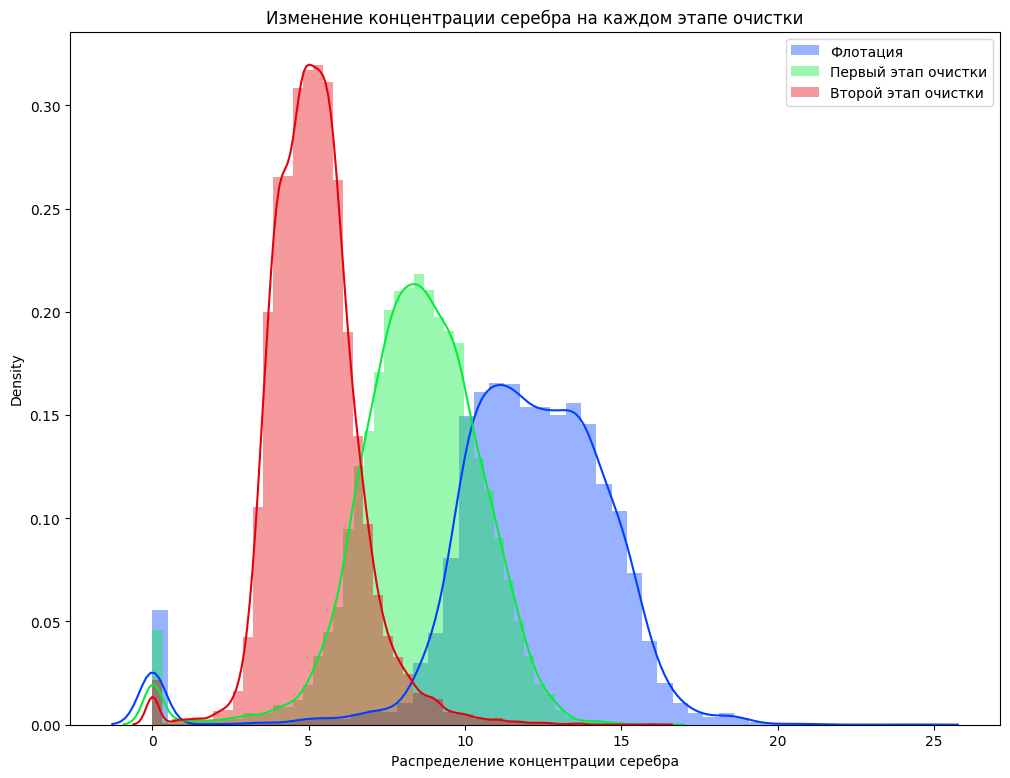

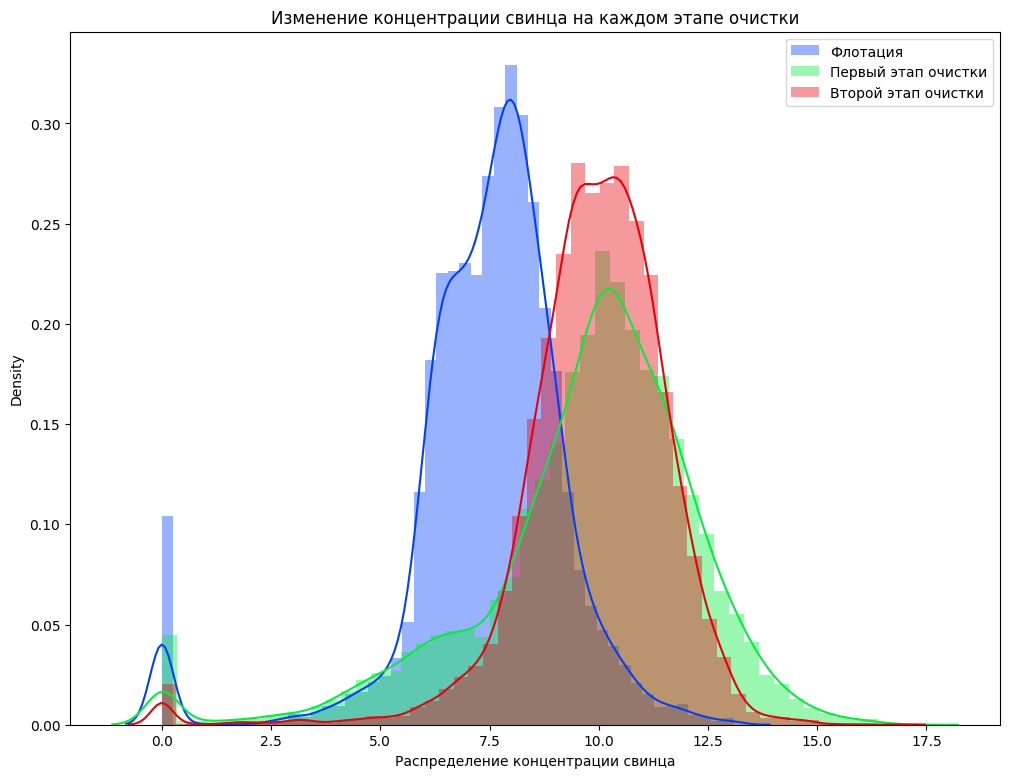

In [13]:
 # создадим список для цикла
poisoning_chemistry = [('au', 'золота'), ('ag', 'серебра'), ('pb', 'свинца')]

chemical_stage = [('rougher.output.concentrate_', 'Флотация'), 
               ('primary_cleaner.output.concentrate_', 'Первый этап очистки'), 
               ('final.output.concentrate_', 'Второй этап очистки')]

# создаём цикл для вывода необходимых графиков
for i in poisoning_chemistry:
    plt.figure(figsize=(12,9))
    for item in chemical_stage:
        ax = sns.distplot(df_full[item[0] + i[0]], label=item[1])
        plt.legend()
        _ = ax.set(xlabel='Распределение концeнтрации ' + i[1], 
                   title='Изменение концентрации ' + i[1] + ' на каждом этапе очистки')
    plt.show()
    
    
 

Судя по графику можем заключить следущее:

С каждой очисткой концентрация золота увеличивается;  
С каждой очисткой концентрация серебра уменьшается;     
С каждой очисткой концентрация свинца сначала увеличивается, но потом будто выравнивается +/- на один уровень.     

Параметры этапов  
air amount — объём воздуха  
fluid levels — уровень жидкости  
feed size — размер гранул сырья  
feed rate — скорость подачи  

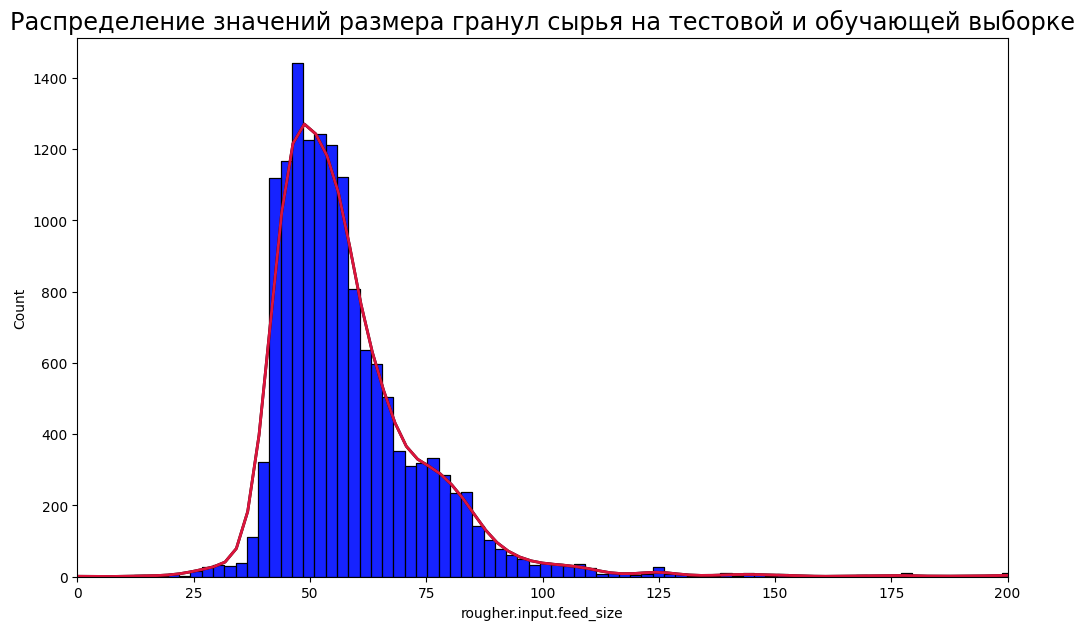

In [14]:
# рассмотрим оба графика на одном

plt.figure(figsize = (12,7))
plt.xlim(0, 200)
ax = sns.histplot(df_train['rougher.input.feed_size'], 
                  bins=200, 
                  kde=True, 
                  alpha=0.7,
                  line_kws = {'color': 'red', "lw":2})
ax.lines[0].set_color('black')
ax = sns.histplot(df_test['rougher.input.feed_size'], 
                  bins=200, 
                  kde=True, 
                  color='blue',
                  alpha=0.7,
                  line_kws = {'color': 'red', "lw":2})
ax.lines[1].set_color('crimson')
plt.title('Распределение значений размера гранул сырья на тестовой и обучающей выборке', fontsize='xx-large')
plt.show()

Построим распределения, используя оценку плотности ядра.

График оценки плотности ядра (KDE) — это метод визуализации распределения наблюдений в наборе данных, аналогичный гистограмме. KDE представляет данные, используя непрерывную кривую плотности вероятности в одном или нескольких измерениях.



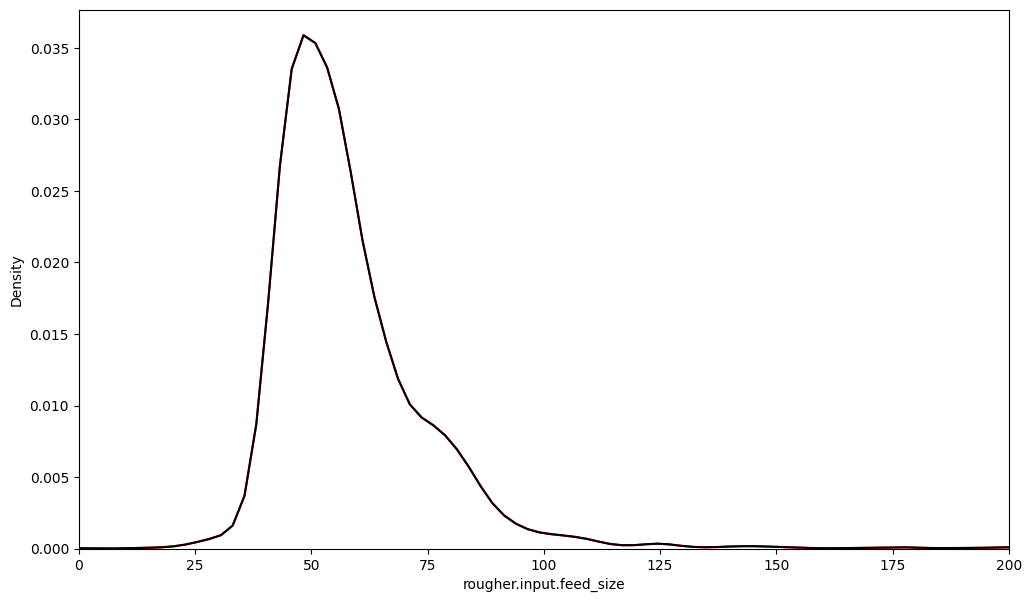

In [15]:
plt.figure(figsize = (12,7))
plt.xlim(0, 200)
ax = sns.kdeplot(df_train['rougher.input.feed_size'], color='red')
ax = sns.kdeplot(df_test['rougher.input.feed_size'], color='black')
plt.title('Оценка плотности распределения размера гранул сырья на тестовой и обучающей выборке', fontsize='xx-large')
plt.title('')
plt.show()

Распределения не пересекаются, средние немного смещены.

Для моделей машинного обучения такое распределение не повлияет негативно, можно оставить значения без изменений.

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

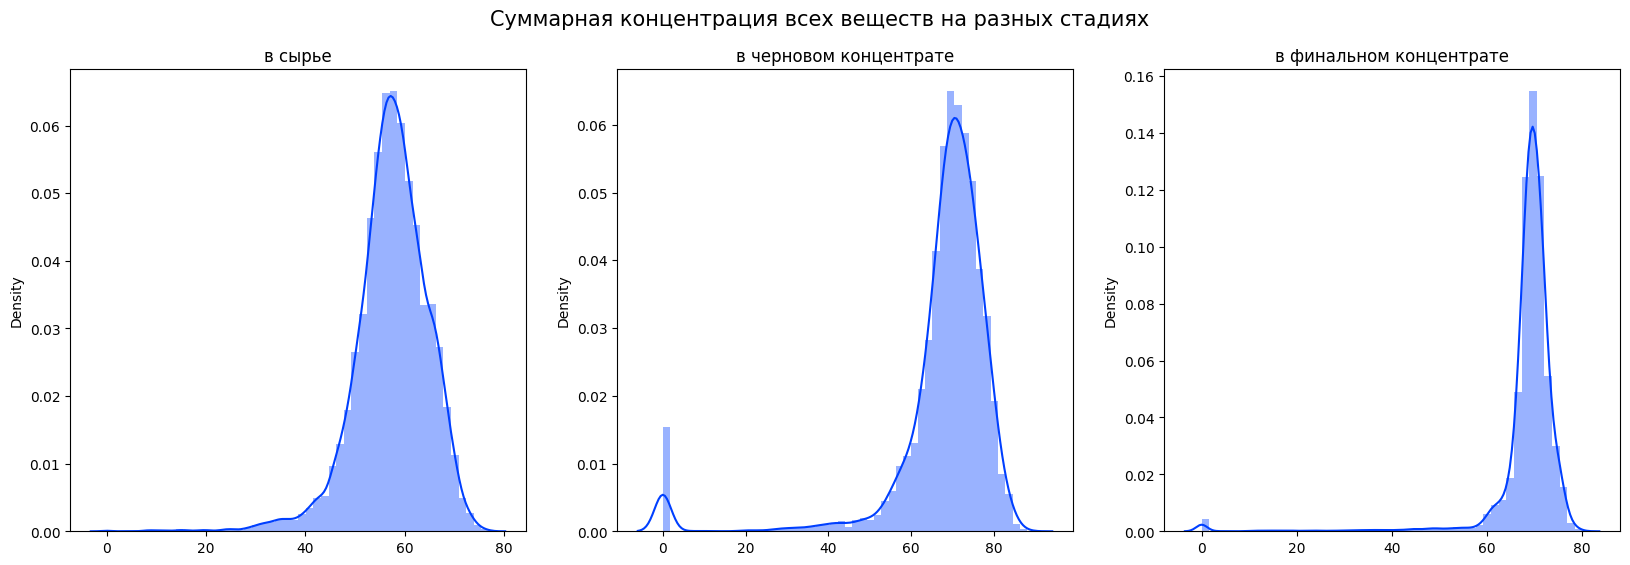

In [16]:
concentration_stages = [('rougher.input.feed_', 'в сырье'),
                        ('rougher.output.concentrate_', 'в черновом концентрате'), 
                        ('final.output.concentrate_', 'в финальном концентрате')]


fig, axs = plt.subplots(1, len(concentration_stages), figsize=(20, 6))
fig.suptitle('Суммарная концентрация всех веществ на разных стадиях', fontsize=15)


for stage, ax in zip(concentration_stages, axs):
    ax.set_title(stage[1])
    train_sum =  df_train[stage[0]+ 'ag'] + df_train[stage[0]+ 'au'] + df_train[stage[0]+ 'pb'] + df_train[stage[0]+ 'sol']

    sns.distplot(train_sum, ax=ax)   

plt.show()

Как видно из гистограмм, в некоторых строках есть нулевая концентрация содержания веществ.

Такое возможно только если:

ошибка в данных  
пустая порода, которая не имела в себе концентраций необходимых материалов  
порода осталась в хвостах после обогащения.

В тренировочной, думаю, лучше нули удалить, если есть подозрения на то, что таргет имеет некорректное значение. Концентрация золота в хвостах и концентрате используется для расчета таргета. Но даже если у нас сомнительные значения для других металлов (например 0), то вполне возможно, что у нас и с золотом что-то не то. Так что, если таких значений не слишком много, то лучше убрать эти записи.

Что касается теста, то тут всегда тонкий момент. Если у нас в таргете напрямую какие-то явные аномалии: пропуски, бесконечность, нулевой коэффициент очистки и т.п., то наверное лучше удалить такие записи. Т.к. наша цель научить модель предсказывать нормальные значения таргета, а не какие-то аномалии, и метрику работы модели тогда нужно оценивать на нормальном таргете без аномалий.

Что касается неявных проблем с таргетом, то тут стоит из теста удалять записи, только если есть четкое представление, что таргет скомпрометирован. И на практике это нужно обсуждать со специалистами, с заказчиком.

Текущее эталонное решение от практикума, насколько я понимаю, не предполагает чистку теста по аномалиям в столбцах с концентрацией, поэтому пока трогать не будем.

In [17]:
# Удалим аномалии
train_sum = df_train.replace(0, np.nan)
train_sum = df_train.dropna(how='all', axis=0)


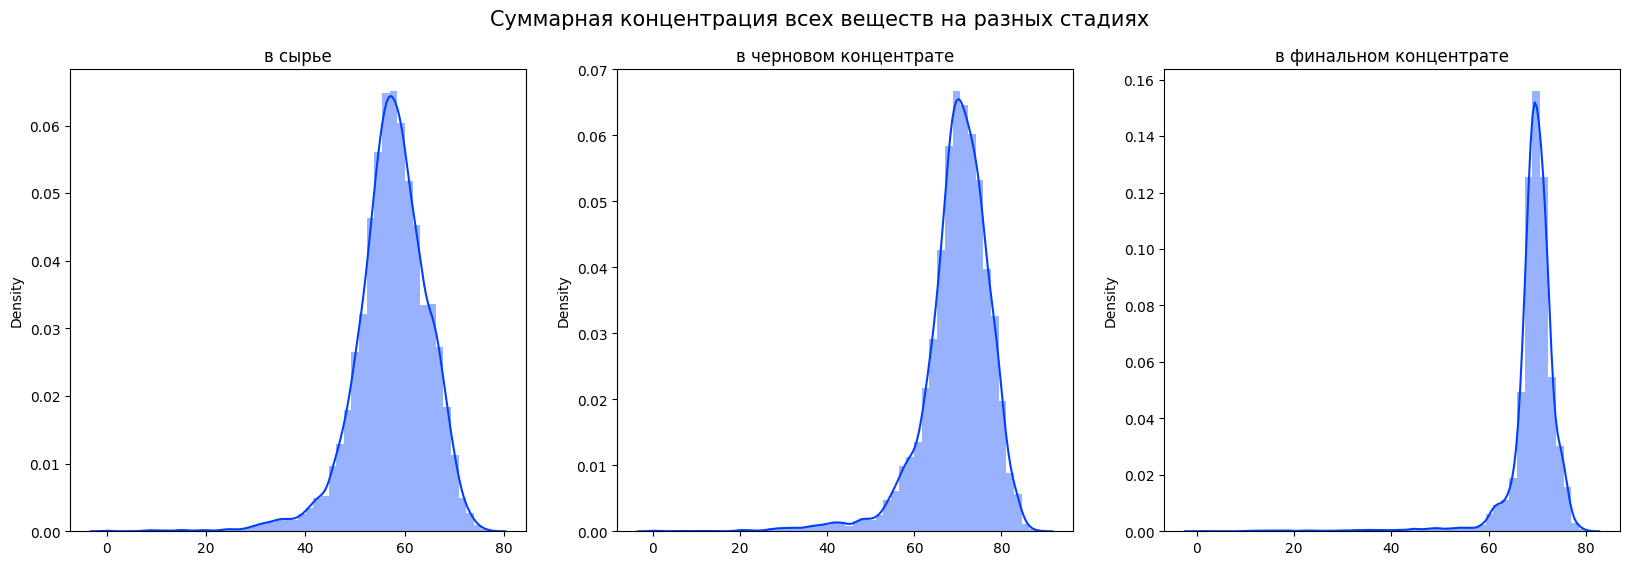

In [18]:
# Смотрим результат на графике
fig, axs = plt.subplots(1, len(concentration_stages), figsize=(20, 6))
fig.suptitle('Суммарная концентрация всех веществ на разных стадиях', fontsize=15)


for stage, ax in zip(concentration_stages, axs):
    ax.set_title(stage[1])
    final =  train_sum[stage[0]+ 'ag'] + train_sum[stage[0]+ 'au'] + train_sum[stage[0]+ 'pb'] + train_sum[stage[0]+ 'sol']
    sns.distplot(final.replace(0,np.nan).dropna(), ax=ax) 
    

plt.show()

Аномалий нет. Исходя из грaфиков видно, что на финальной стадии суммaрная концентрация веществ в разы уменьшается.

<a id='step3'></a>  **Модель**

3. Постройте модель  
3.1. Напишите функцию для вычисления итоговой sMAPE.  
3.2. Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.  
Вам пригодятся формулы метрик качества:  



В метрике MAPE (mean absolute percentage error) в знаменатель помещают целевое значение.


С особым случаем, когда в знаменателе оказывается 
0, обычно поступают "инженерным" способом: или выдают за непредсказание 
 на таком объекте большой, но фиксированный штраф, или пытаются застраховаться от подобного на уровне формулы и переходят к метрике SMAPE (symmetric mean absolute percentage error).

Если же предсказывается ноль, штраф считаем нулевым.

Таким переходом от абсолютных ошибок на объекте к относительным мы сделаем объекты в тестовой выборке равнозначными.

Используем способ векторизованных вычислений:

In [19]:
def sMAPE(target, predict):
    target = target.to_numpy()
    numerator = np.abs(target - predict)
    denominator = (np.abs(target) + np.abs(predict)) / 2
    smape = ((numerator / denominator) * 100)
    
    sMAPE_1 = 0.25 * smape[:, 0].mean()
    sMAPE_2 = 0.75 * smape[:, 1].mean()
    
    return sMAPE_1 + sMAPE_2



Обучение модели  

Для обучения модели, разделим обучающую выборку на параметры и таргет, отбросив те столбцы, которых нет в тестовой выборке.

Так же воспользуемся StandartScaler и масштабируем значения, улучшив тем самым качество моделей.

In [20]:
features = df_train.drop(columns_not_needed, axis=1) # отбрасываем столбцы
target = df_train[['rougher.output.recovery', 'final.output.recovery']]

scaler = StandardScaler()
scaler.fit(features) 
features = scaler.transform(features)

Сделаем scorer из нашей функции sMAPE:


In [21]:

smape_scorer = make_scorer(sMAPE, greater_is_better=False)

Проверим модель линейной регрессии:


Во входные данные для генератора перекрестной проверки cv возьмем 5-кратную перекрестную проверку по умолчанию.


In [22]:
model = LinearRegression()

scores = -1 * cross_val_score(model, features, target, scoring=smape_scorer, cv=5)
final_score = scores.mean()
print('Средняя оценка качества модели:', final_score)

Средняя оценка качества модели: nan


In [23]:
best_depth_t = 0
final_score_b = 1000

for depth in tqdm(range(2, 12)):
    model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    scores = -1 * cross_val_score(model, features, target, scoring=smape_scorer, cv=5)
    final_score = scores.mean()
    if final_score < final_score_b:
        final_score_b = final_score
        best_depth_t = depth
        
# сохраним лучшие параметры в словаре
tree_best = {'depth':best_depth_t}
print('Средняя оценка качества модели:', final_score_b)

100%|█████████████████████████████████████████████████████████████| 10/10 [00:20<00:00,  2.05s/it]

Средняя оценка качества модели: 8.11066049635836


Проверим модель случайного леса:

In [24]:
best_depth_f = 0
best_est_f = 0
final_score_b = 1000

for est in tqdm(range(10, 51, 10)):
    for depth in range (3, 10):
        model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        scores = -1 * cross_val_score(model, features, target, scoring=smape_scorer, cv=5)
        final_score = scores.mean()
        if final_score < final_score_b:
            final_score_b = final_score
            best_est_f = est
            best_depth_f = depth
            
# сохраняем параметры в словаре
forest_best = {'depth':best_depth_f, 'n_estimators':best_est_f}
print('Средняя оценка качества модели:', final_score_b)

100%|██████████████████████████████████████████████████████████████| 5/5 [29:53<00:00, 358.62s/it]

Средняя оценка качества модели: 7.1020879928839165


In [25]:
forest_best

{'depth': 3, 'n_estimators': 40}

Вывод:

Лучшее качество показала модель Случайный лес с количеством деревьев 40 и глубиной 3.


Проверка качества на тестовой выборке.

Найдем необходимые значения таргета в полном датасете для тестовой выборке и проверим результаты:  

In [26]:
features_train = df_train.drop(columns_not_needed, axis=1)
features_train = scaler.transform(features_train)
target_train = df_train[['rougher.output.recovery', 'final.output.recovery']]

target_test = (
    df_full[df_full['date']
            .isin(df_test['date'])]
    .reset_index(drop=True)
)

features_test = target_test.drop(columns_not_needed, axis=1)
features_test = scaler.transform(features_test)
target_test = target_test[['rougher.output.recovery', 'final.output.recovery']]

model = RandomForestRegressor(random_state=12345, 
                              n_estimators=forest_best['n_estimators'], 
                              max_depth=forest_best['depth'])
model.fit(features_train, target_train)
predicted = model.predict(features_test)

sMAPE_test = sMAPE(target_test, predicted)
print('sMAPE на тестовой выборке:', sMAPE_test)

sMAPE на тестовой выборке: 6.914172698536802


Проверка адекватности модели


В sklearn есть модель  DummyRegressor.
Применяется аналогично другим моделяем. Предсказывает средним значением таргета по обучающей выборке.

In [27]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train, target_train)
predicted_dummy = dummy_regr.predict(features_test)

sMAPE_dummy = sMAPE(target_test, predicted_dummy)
print('sMAPE на dummy:', sMAPE_dummy)

sMAPE на dummy: 11.710826919659548


***Вывод:***

Проверили, что эффективность обогащения рассчитана правильно. Вычислили её на обучающей выборке для признака rougher.output.recovery. Нашли MAE между расчётами и значением признака. Средний MAE - 0.0.  
Проанализировали признаки, недоступные в тестовой выборке. Тестовая выборка содержит в себе столбцы, которые являются исходными, то есть до начала обогащения. Следовательно, на этих признаках нельзя было обучать, так как они не были доступны на тестах, поэтому мы их исключили.
Провели предобработку данных. Зaполнили пропуски знaчением предыдущей строки. 

Проанализировали данные.  
Посмотрели, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки:  
С каждой очисткой концентрация золота увеличивается;  
С каждой очисткой концентрация серебра уменьшается;  
С каждой очисткой концентрация свинца сначала увеличивается, но потом выравнивается.  

Сравнили распределения размеров гранул сырья на обучающей и тестовой выборках. Там все приемлемо.  
Исследовали суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.   
Удалили аномалии. Выявили, что на финальной стадии суммaрная концентрация веществ в разы уменьшается.  

Построили модель.  
Написали функцию для вычисления итоговой sMAPE.  
Обучили разные модели и оценили их качество кросс-валидацией.   
В ходе обучения лучшее качество показала модель Случайный лес с количеством деревьев 40 и глубиной 5.  

Итоговый sMAPE на тестовой выборке -  9.136050449695134.    
Проверка адекватности модели - sMAPE при DummyRegressor - 10.289630376021057.    

Модель на тестовой выборке превосходит константную модель по медиане. Соответственно такую модель можно использовать.  